# Lab 2. Probability and Statistics

### Due date: Friday 01/28 at 10:59 pm
**On gradescope, make sure to assign only the pages with your implementation to the question**

In this lab we are going to use Python to review some statistics concepts studied in class:
- Random Variables and Statistical Distributions
- Law of Large Number and Central Limit Theorem
- Maximum likelihood estimation
- Least squares regression, Ridge, Lasso

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import datascience as ds
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
from scipy import stats
from scipy import special
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import gamma
from scipy.optimize import minimize
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Part 1: Random Variables and Statistical Distributions

* Reference: https://scipy.github.io/devdocs/tutorial/stats.html

### 1.1 Binomial
A binomial random variable with parameters $(n, p)$, counting the number of successes in $n$ independent trials with success probability $p$, can be described as the sum of $n$ independent Bernoulli random variables of parameter $p$, i.e.,
$$
    Y = \sum_{i=1}^{n} X_i\,, \quad X_{i} \stackrel{\text{i.i.d.}}{\sim}\text{Bernoulli}(p)\,,
$$
with probability mass function
$$
    f(k| n, p) = \binom{n}{k}p^{k}(1 - p)^{n-k}\,, k\in\{0, 1, 2, \dots, n\}\,,
$$
where $\mathbb{E}Y = np$ and $Var(Y) = np(1-p)$.

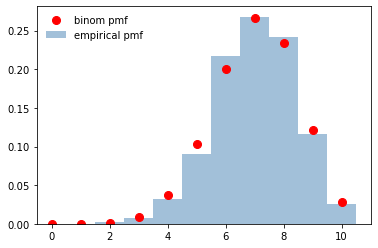

In [2]:
n, p = 10, 0.7
x = np.arange(n + 1) # All possible outcomes

# Display the probability mass function
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'ro', ms=8, label='binom pmf')
#ax.vlines(x, 0, binom.pmf(x, n, p), colors='r', lw=5, alpha=0.5)

np.random.seed(155)
# Alternative way to define the binomial distribution and call pmf
binom_samples = binom.rvs(n, p, size=1000)
ax.hist(binom_samples, bins= x + 0.5, density=True, alpha=0.5, lw=3,
         histtype='stepfilled', color='steelblue',
         edgecolor='none', label='empirical pmf') # compare the histogram
ax.legend(loc='best', frameon=False)
plt.show()
# emphasize the bias here

In [3]:
"""
TODO: 1. compute the mean and variance of the samples
"""

### BEGIN SOLUTION
mean = np.mean(binom_samples)
var = np.var(binom_samples)
### END SOLUTION

print( "mean(r) - np = " ,mean - n*p)
print( "var(r) - np(1-p) = ",var- n*p*(1-p))

mean(r) - np =  0.020999999999999908
var(r) - np(1-p) =  -0.1334410000000006


### 1.2 Normal

The probability density function for normal distribution is
$$
    f(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi}} \exp \Big(\frac{-(x - \mu)^{2}}{2\sigma^2} \Big)\,.
$$

Sample Mean =  2.075438688648664
Sample Variance =  15.940940260398888


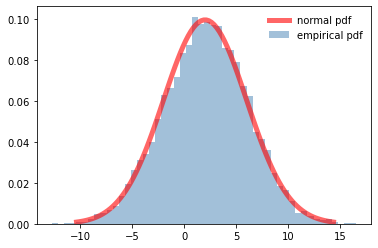

In [4]:
# Display the probability density function
fig, ax = plt.subplots(1, 1)
# ppf is the percent point function (inverse of cdf — percentiles).
x = np.linspace(norm.ppf(0.001, loc=2, scale=4), norm.ppf(0.999, loc=2, scale=4), 100) 
ax.plot(x, norm.pdf(x, loc=2, scale=4),'r-', lw=5, alpha=0.6, label='normal pdf')

norm_samples = norm.rvs(loc=2, scale=4, size=10000, random_state = 182)
print("Sample Mean = ", np.mean(norm_samples))
print("Sample Variance = ", np.var(norm_samples))
ax.hist(norm_samples, bins=50, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none', label='empirical pdf') # compare the histogram
ax.legend(loc='best', frameon=False)
plt.show()

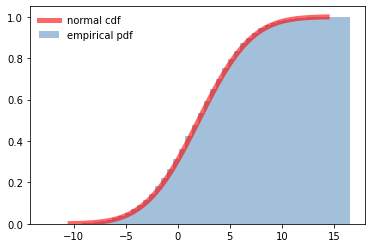

In [5]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.001, loc=2, scale=4), norm.ppf(0.999, loc=2, scale=4), 100) 

"""
TODO: 2. show the cdf of gaussian.
"""

### BEGIN SOLUTION
ax.plot(x, norm.cdf(x, loc=2, scale=4),'r-', lw=5, alpha=0.6, label='normal cdf')
ax.hist(norm_samples, bins=50, density=True, cumulative = True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none', label='empirical pdf')
ax.legend(loc='best', frameon=False)
### END SOLUTION

ax.legend(loc='best', frameon=False)
plt.show()

### 1.3 Gamma Distribution

A random variable $X$ that is gamma-distributed with shape $\alpha$ and rate $\beta$ is denoted by
$$
    X \sim \Gamma(\alpha, \beta)\,,
$$
where the corresponding probability density function is parametrized by shape $\alpha$ and rate $\beta$
$$
    f(x|\alpha ,\beta )= \frac {\beta ^{\alpha } x^{\alpha -1}e^{-\beta x}}{\Gamma (\alpha )}\,, \quad \text{ for } x>0 \quad \alpha ,\beta >0\,,
$$
where $\Gamma (\alpha) = \int_{0}^{\infty} x^{\alpha - 1}e^{-x}d\,x$ is the gamma function.

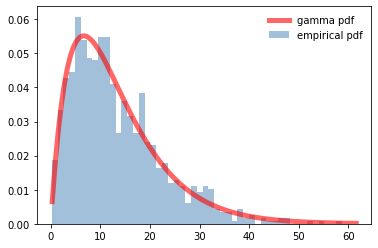

In [6]:
alpha = 2
beta = 0.15
n = 1000

# Generate random variables with given seed
gamma_samples = gamma.rvs(alpha, scale = 1/beta, size=n, random_state= 155)

# Display the probability density function
fig, ax = plt.subplots(1, 1)
x = np.linspace(gamma.ppf(0.001, alpha, scale = 1/beta), gamma.ppf(0.999, alpha, scale = 1/beta), 100) 
ax.plot(x, gamma.pdf(x, alpha, scale = 1/beta),'r-', lw=5, alpha=0.6, label='gamma pdf')
ax.hist(gamma_samples, bins=50, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none', label='empirical pdf') # compare the histogram:
ax.legend(loc='best', frameon=False)
plt.show()

In [7]:
"""
TODO: 3. compute the first four moments of gamma function, theoretical value.
"""

### BEGIN SOLUTION
mean, var, skew, kurt = gamma.stats(alpha, scale = 1/beta, moments='mvsk')
### END SOLUTION

print("Mean = ", mean)
print("Variance = ", var)
print("Skewness = ", skew)
print("Kurtosis = ", kurt)

Mean =  13.333333333333334
Variance =  88.8888888888889
Skewness =  1.414213562373095
Kurtosis =  3.0


## Part 2: Law of Large Number and Central Limit Theorem

### 2.1 Law of Large Number

Let $X_1, X_2, \cdots, X_n$ be i.i.d. scalar random variables with $X_i \stackrel{\sim}{=} X$ (same distribution) for all $i \in \{1, \cdots, n\}$. Let $\overline{X}_n = (X_1 + \cdots + X_n)/n$ denote the sample average.

* Weak Law: If $\mathbb{E} |X| <\infty$ and $\mathbb{E}X  = \mu$, then $\overline{X}_n \stackrel{\text{P}}{\to}\mu$, that is 
$$
    \lim _{n\to \infty }\mathbb{P} \!\left(\,|{\overline {X}}_{n}-\mu |<\varepsilon \,\right)=1\,, \quad \forall \epsilon >0\,.
$$
An $L^2$ version can be proved by Chebyshev inequality. Suppose that $Var(X_i) = \sigma^2 < \infty$, then $Var(\overline{X}_n) = Var(X_i)/n = \sigma^2/n$. By Chebyshev,
$$
    \mathbb{P}\left( |{\overline{X}}_{n}-\mu | > \epsilon \right) \leq \frac{\sigma^2}{n \epsilon^2}\,,
$$
The desired argument follows by letting $n \to \infty$. The assumption $Var(X_i) = \sigma^2<\infty$ is not necessary, which can be removed by truncation method. 


* Strong Law: If $\mathbb{E} |X| <\infty$ and $\mathbb{E}X  = \mu$, $\overline{X}_n \stackrel{\text{a.s.}}{\to}\mu$, that is 
$$
    \mathbb{P}\left(\,\lim _{n\to \infty } |{\overline{X}}_{n}-\mu |=0 \,\right)=1\,.
$$

In [8]:
num_trials = 10000 # number of trials

# Binomial parameters
n = 10
p = 0.7
avg_binom = []
std_binom = []
binom_samples = binom.rvs(n, p, size=num_trials, random_state = 155)

# In each simulation, there is one trial more than the previous simulation
for i in range(1, num_trials + 1):
    avg_binom.append(np.mean(binom_samples[0:i]))
    std_binom.append(np.std(avg_binom)) # Tract the std of sample average
    
# Convert list to np.array
avg_binom = np.array(avg_binom)
std_binom = np.array(std_binom)

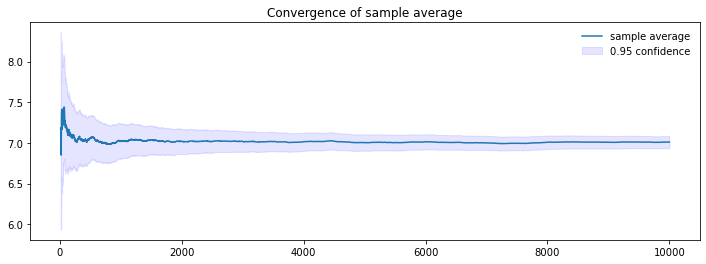

In [9]:
# Plot the dynamics of sample average
x = np.arange(1, num_trials + 1)
fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.plot(x[10:], avg_binom[10:], label = 'sample average')
ax.fill_between(x[10:], (avg_binom[10:] - 1.96*std_binom[10:]), (avg_binom[10:] + 1.96*std_binom[10:]), color='b', alpha=.1, label = '0.95 confidence')
ax.set_title("Convergence of sample average")
ax.legend(loc='best', frameon=False)
plt.show()

### 2.2 Central Limit Theorem

Suppose $X_{1},\cdots ,X_{n}$ is a sequence of i.i.d. random variables with $\mathbb{E}X_{i} = \mu$ and $Var(X_{i})=\sigma^{2}<\infty$. Define random variable $Z_n := \frac{\sqrt{n}}{\sigma}( \overline{X}_{n}-\mu)$. Then $Z_n$ converges in distribution to standard normal $N(0, 1)$ as $n \to \infty$, that is

$$
   Z_n :=\frac{\sqrt{n}}{\sigma}( \overline{X}_{n}-\mu) \stackrel{\text{d}}{\to} N(0, 1)\,.
$$

Basically, CLT describes how fast $\overline{X}_n$ converges to $\mu$.

## Part 3: Maximum Likelihood Estimation

Given i.i.d. samples $x_1, x_2, \ldots, x_n$ where $x_i \stackrel{\text{i.i.d.}}{\sim} \Gamma(\alpha, \beta)$, the likelihood function is
$$
\text{likelihood }(\alpha, \beta|x_1, \dots, x_n) = \prod_{i=1}^n f(x_i|\alpha ,\beta)= \prod_{i=1}^n \frac{\beta^{\alpha}}{\Gamma(\alpha)} x_i^{\alpha-1} e^{-\beta x_i}\,.
$$
Then the log-likelihood function is
\begin{align*}
L(\alpha, \beta) \,&= \sum_{i=1}^n \Big( \alpha \log \beta - \log\Gamma(\alpha) + (\alpha-1)\log x_i -\beta x_i \Big)\\
    \,&= (\alpha - 1) \sum_{i=1}^n \log x_i - \beta \sum_{i=1}^n x_i + n\alpha \log \beta - n\log\Gamma(\alpha)\,.
\end{align*}

In [10]:
alpha = 2
beta = 0.15
gamma_samples = gamma.rvs(alpha, scale = 1/beta, size=1000, random_state = 337)

"""
TODO: 4. write a function which returns log-likelihood.
"""

def logLikelihood(samples, alpha, beta):
    n = len(samples)
    sample_sum = np.sum(samples)
    log_sum = np.sum(np.log(samples))
    ### BEGIN SOLUTION
    return (alpha - 1)*log_sum - beta*sample_sum + n*alpha*np.log(beta) - n*np.log(special.gamma(alpha))
    ### END SOLUTION

print(logLikelihood(gamma_samples, alpha, beta))

-3473.1857554954


### 3.1 MLE of $\beta$ for fixed $\alpha$

Differentiate with respect to $\beta$ for fixed $\alpha$, then we have the first-order condition
$$
\frac{d}{d\beta} L(\alpha, \beta) = \frac{n\alpha}{\beta} - \sum_{i=1}^n x_i = 0
$$
For fixed $\alpha$, the MLE of $\beta$ is
$$
    \hat{\beta}_{\alpha} = \frac{n \alpha}{\sum_{i=1}^n x_i}\,.
$$

### 3.2 MLE of $\alpha$ for fixed $\beta$
Differentiate with respect to $\alpha$ for fixed $\beta$, then we have the first-order condition
$$
\frac{d}{d\alpha} L(\alpha, \beta) = \sum_{i=1}^n \log x_i + n \log \beta - n \frac{\Gamma^{\prime}(\alpha)}{\Gamma(\alpha)} = 0\,, \quad \Gamma^{\prime}(\alpha) = \frac{d \Gamma(\alpha)}{d \alpha}\,.
$$
The solution $\hat{\alpha}$ to equation above is the MLE of $\alpha$ when given $\hat{\beta}_{\alpha} = \frac{n \alpha}{\sum_{i=1}^n x_i}$. However, there is no closed-form analytical solution to $\hat{\alpha}$. We can only get the solutions numerically.

### 3.3 MLE of $\alpha$ and $\beta$ (numerical solution)

The solution $(\hat{\alpha}, \hat{\beta})$ to the following system
\begin{align*}
\frac{\partial}{\partial \alpha} L(\alpha, \beta) \,& = \sum_{i=1}^n \log x_i + n \log \beta - n \frac{\Gamma^{\prime}(\alpha)}{\Gamma(\alpha)} = 0\\
\frac{\partial}{\partial \beta} L(\alpha, \beta) \,&= \frac{n\alpha}{\beta} - \sum_{i=1}^n x_i = 0
\end{align*}

The Hessian of $L(\alpha, \beta)$,
$$
H(\alpha, \beta) = \begin{bmatrix}
-\frac{n}{\Gamma(\alpha)^2} [\Gamma^{\prime\prime}(\alpha)\Gamma(\alpha) - (\Gamma^{\prime}(\alpha)^2)] & \frac{n}{\beta}\\
\frac{n}{\beta} & -\frac{n\alpha}{\beta^2}
\end{bmatrix}
$$

If $H(\alpha, \beta)$ is negative definite, i.e., all eigenvalues are negative, then the solution $(\hat{\alpha}, \hat{\beta})$ is the unique maximizer of $L(\alpha, \beta)$.

* Most numerical optimization systems include a minimizing function because minimizing distances is a common use. We are going to use the function `minimize` from the `scipy.optimize`.

* The argument of `minimize` is the name of the function being minimized. This function must only take numerical arguments (more than one is fine) and return a numerical output, and it returns the minimizing argument (or arguments) of the specified function.

* Maximizing a function is the same as minimizing the negative of that function. In the cell below, define the function that has to be specified as the argument to `minimize` in order to find the maximum likelihood estimates of $\alpha$ and $\beta$. Remember that the function should only take $\theta = (\alpha, \beta)$ as its argument.

In [11]:
"""
TODO: 5. write the target function to minimize
"""

def target(theta):
    ### BEGIN SOLUTION    
    return -1 * logLikelihood(gamma_samples, theta[0], theta[1])
    ### END SOLUTION

In [12]:
bnds = ((0, None), (0, None)) # alpha and beta must be positive
x0 = (1, 0.1) # initial guess

"""
TODO: 6. minimize the target using scipy.optimize.miniimize and method 'Nelder-Mead'
"""

### BEGIN SOLUTION 
minimize(target, x0, method='Nelder-Mead', bounds=bnds, tol=1e-6)
### END SOLUTION

 final_simplex: (array([[2.01071597, 0.15074426],
       [2.010715  , 0.15074416],
       [2.01071565, 0.1507442 ]]), array([3473.17734193, 3473.17734193, 3473.17734193]))
           fun: 3473.1773419297947
       message: 'Optimization terminated successfully.'
          nfev: 108
           nit: 57
        status: 0
       success: True
             x: array([2.01071597, 0.15074426])

## Part 4: Linear regression

### 4.1 Ordinary Least Squares 


Linear regression fits a linear model with coefficients $\beta = (\beta_0, \beta_1, \dots, \beta_p)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically, OLS estimator is
$$
\hat{\beta}_{ols} = \arg \min_{\beta} \| y - X\beta \|^2_2\,.
$$



A 2013 study in the International Journal of Exercise Science studied collegiate shot put athletes and examined the relation between strength and shot put distance. The population consists of 28 female collegiate athletes. Strength was measured by the the biggest amount (in kilograms) that the athlete lifted in the "1RM power clean" in the pre-season. The distance (in meters) was the athlete's personal best.

In [13]:
# Load the dataset
shotput = ds.Table.read_table('shotput.csv')
shotput_X, shotput_y = shotput['Weight Lifted'], shotput['Shotput Distance']
shotput_X = np.reshape(shotput_X, (-1, 1)) # X needs to be in matrix form

In [14]:
# Create linear regression object
lr = linear_model.LinearRegression()

"""
TODO: 7. fit the model
"""

### BEGIN SOLUTION 
lr.fit(shotput_X, shotput_y)
### END SOLUTION

shotput_y_pred = lr.predict(shotput_X)
shotput = shotput.with_column('Predicted Shotput Distance', shotput_y_pred)
print("=============================")
print("ols")
print("Coefficients: \n", lr.coef_)
print("Intercept: ", lr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(shotput_y, shotput_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(shotput_y, shotput_y_pred))

ols
Coefficients: 
 [0.09834382]
Intercept:  5.959629098373954
Mean squared error: 1.49
Coefficient of determination: 0.80


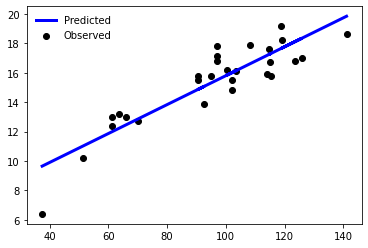

In [15]:
fig, ax = plt.subplots(1, 1)
ax.plot(shotput_X, shotput_y_pred, color="blue", linewidth=3, label = "Predicted")
ax.scatter(shotput_X, shotput_y, color="black", label = "Observed")
ax.legend(loc='best', frameon=False)
plt.show()

### 4.2 Ridge and Lasso
* Reference: https://www.statlearning.com/

If $n \gg p$, that is, the number of observations is much larger than the number of features, then the least squares estimates tend to also have low variance, and hence will perform well on test observations. However, if $n$ is not much larger than $p$, then there can be a lot of variability in the least squares fit, resulting in overfitting and consequently poor predictions on future observations not used in model training.

This shrinkage (also known as regularization) has the effect of reducing variance. This technique regularizes coefficient estimates by adding penalty, or equivalently, shrinks the coefficient estimates towards zero. The two best-known techniques for shrinking the regression coefficients towards zero are ridge regression and the lasso.

OLS estimator
$$
\hat{\beta}_{ols} = \arg \min_{\beta} \| y - X\beta \|^2_2\,.
$$

Ridge estimator:
$$
\hat{\beta}_{ridge} = \arg \min_{\beta} \| y - X\beta \|^2_2 + \alpha \|\beta \|_2^2\,,
$$

Lasso estimator:
$$
\hat{\beta}_{lasso} = \arg \min_{\beta} \| y - X\beta \|^2_2 + \alpha \|\beta \|_1\,,
$$

In [16]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
#diabetes_X = diabetes_X[:, np.newaxis, 2]

n_test = 400

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-n_test]
diabetes_X_test = diabetes_X[-n_test:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-n_test]
diabetes_y_test = diabetes_y[-n_test:]

In [17]:
alpha = 0.05

classifiers = dict(
    ols = linear_model.LinearRegression(), 
    ridge = linear_model.Ridge(alpha = alpha),
    lasso = linear_model.Lasso(alpha = alpha),
)

In [18]:
for name, regr in classifiers.items():
    # fit the model using traing set
    regr.fit(diabetes_X_train, diabetes_y_train)

    """
    TODO: 8. make predictions using test set
    """

    ### BEGIN SOLUTION 
    diabetes_y_pred = regr.predict(diabetes_X_test)
    ### END SOLUTION
    
    # The coefficients
    print("=============================")
    print(name)
    print("Coefficients: \n", regr.coef_)
    print("Intercept: ", regr.intercept_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

ols
Coefficients: 
 [ -133.23501403  -147.26780714   398.2159149    391.41268408
 -1381.37761065   441.690436     572.86248014   709.53819614
  1458.66474463  -420.16344493]
Intercept:  145.9851967674698
Mean squared error: 4141.69
Coefficient of determination: 0.31
ridge
Coefficients: 
 [ -30.18309598 -102.4970996   323.12631377  239.77071371  -53.27952626
 -216.12098514 -118.10556656  176.5409809   578.26014749  -69.26111876]
Intercept:  149.63413976757354
Mean squared error: 3223.09
Coefficient of determination: 0.46
lasso
Coefficients: 
 [ -88.62317439 -134.51621481  399.09556586  332.43748553 -355.26721802
 -206.59847593    0.          327.66437275 1113.42632535 -403.65677865]
Intercept:  146.20933519578386
Mean squared error: 3945.94
Coefficient of determination: 0.34


* As we may see, some of the coefficients estimated by Lasso are exactly zero. Hence, Lasso can also perform variable selection. 

* For this dataset, $n = 442$ and $p=10$. The performance of Ridge and Lasso is overwhelmed by OLS when $n_{train} \geq 200$. However, the Ridge and Lasso has lower variance than OLS when $n_{train}$ is not much larger than $p$.

## Submission Instructions


### Download Code Portion
* Restart the kernel and run all the cells to make sure your code works.
* Save your notebook using File > Save and Checkpoint.
* Use File > Downland as > PDF via Latex.
* Download the PDF file and confirm that none of your work is missing or cut off. 
* **DO NOT** simply take pictures using your phone. 

### Submitting ###
* Submit the assignment to Lab1 on Gradescope. 
* **Make sure to assign only the pages with your implementation to the question.**